# Regresión lineal
En el siguiente archivo se va a desarrollar la regresión lineal para las combinaciones de cada una de las variables que se encuentran en los datos provistos. Los datos se pueden encontrar [acá](https://docs.google.com/spreadsheets/u/1/d/12h1Pk1ZO-BDcGldzKW-IA9VMkU9RlUOPopFoOK6stdU/pubhtml).

### Imports

In [222]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import statsmodels.api as sm
from statsmodels.formula.api import ols

### Read file

In [223]:
municipios = pd.read_csv("/Users/Meili/Dropbox/Uniandes/Noveno/Visual/BonoParcial/Plebiscito-Colombia-2016/Plebiscito.csv")
municipios.head()

# Create variables
variables=np.array(municipios.keys())
delete=np.array(['Municipio','Departamento','Ganador (1ra vuelta)','Ganador','Afectado por el conflicto (Pares)','Zonas de concentracion','Cultivos ilicitos','Votos por el No','Porcentaje No','Votos por el Si','Porcentaje Si','Votos validos','Votos totales','Cuantos salieron a votar','Abstencion'])
variables=np.setdiff1d(variables,delete)

comparacion=np.array(['Porcentaje No','Porcentaje Si','Abstencion'])

# To numeric

for i in range(len(variables)): 
    pd.to_numeric(municipios[variables[i]])
for i in range(len(comparacion)):
    pd.to_numeric(municipios[comparacion[i]])

### Scaterplot

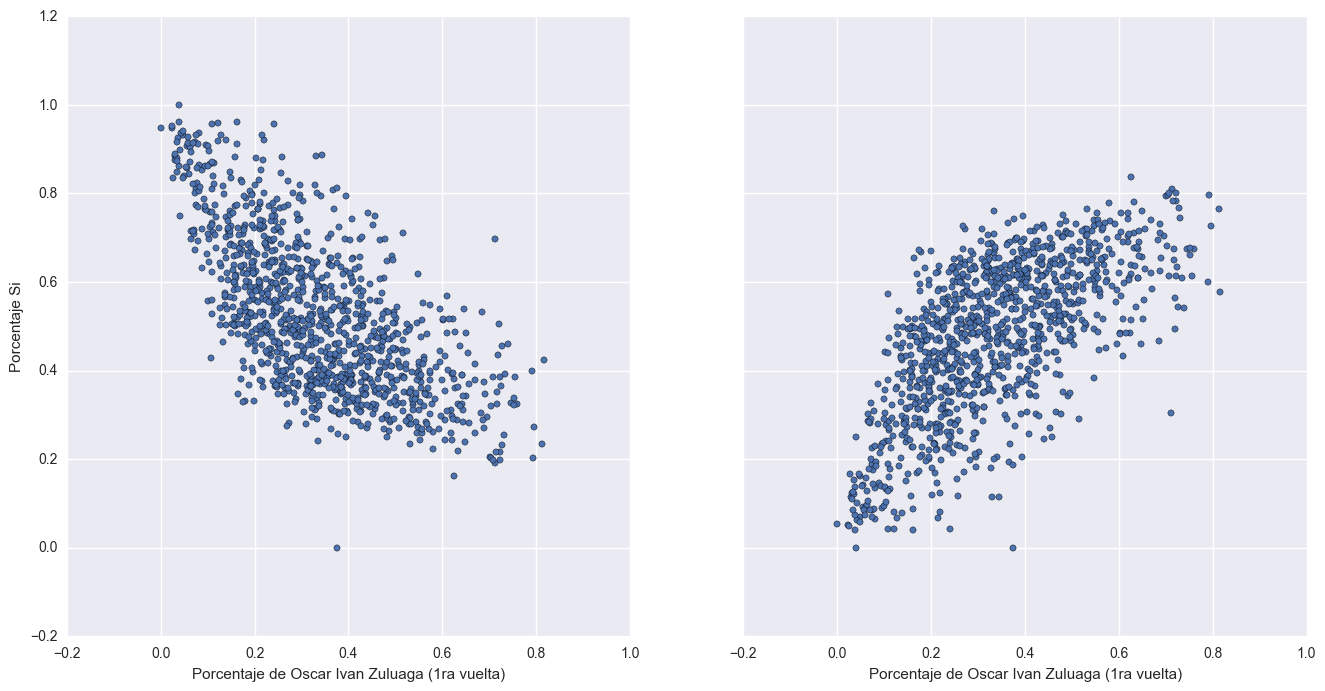

In [224]:
fig, axs = plt.subplots(1, 2, sharey=True)
municipios.plot(kind='scatter', x='Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)', y='Porcentaje Si', ax=axs[0], figsize=(16, 8))
municipios.plot(kind='scatter', x='Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)', y='Porcentaje No', ax=axs[1])

### Regression

In [225]:
results = {'Porcentaje No':{},'Porcentaje Si':{},'Abstencion':{}}
for i in range(len(variables)): 
    for j in range(len(comparacion)):
        variable = str(variables[i])
        comparador = str(comparacion[j])
        if (comparador is not None) and (variable is not None):
            n=len(municipios[comparador])
            x=np.array(municipios[variable])
            y=np.array(municipios[comparador])
            sumx= float(sum(x))
            sumy= float(sum(y))
            sumx2= float(sum(x*x))
            sumy2= float(sum(y*y))
            sumxy= float(sum(x*y))
            promx= float(sumx/n)
            promy= float(sumy/n)
            m =float(sumx*sumy - n*sumxy)/float((sumx**2-n*sumx2))
            b= float(promy - m*promx)
            
            sigmax=np.sqrt(sumx2/n - promx**2)
            sigmay=np.sqrt(sumy2/n - promy**2)
            sigmaxy=sumxy/n - promx*promy
            R2= (sigmaxy/(sigmax*sigmay))**2        
            results[comparador][variable] = [m,b,R2]
results            

{'Abstencion': {'Abandono o Despojo de Tierras': [0.0001672710907285905,
   0.6466217502534573,
   2.5919045287980262e-05],
  'Actos terroristas': [-1.8947548620323118e-05,
   0.6467459847878942,
   3.9334085634960675e-06],
  'Afectado por el conflicto (Pares)2': [0.010199278401088623,
   0.641897665136031,
   0.012562694107396672],
  'Amenaza': [0.0005553604190322776, 0.6386039645483595, 0.022618491655842961],
  'Censo electoral 2016': [-2.2103203162242393e-08,
   0.6473639573808458,
   0.0024095788062024983],
  'Desplazamiento': [3.4102181808713436e-05,
   0.6363693719021458,
   0.038213494183323392],
  'Hectareas de amapola': [4.7303117700612505e-05,
   0.6466632852183112,
   9.5034526389643606e-06],
  'Hectareas de coca': [1.043986451294787e-05,
   0.64579431938293,
   0.0060160592381282591],
  'Homicidio': [0.00036862504642552464,
   0.6365149462321209,
   0.018906204014835587],
  'Minas Antipersonal': [0.00041947079410025237,
   0.64644604138161,
   8.5701360806961875e-05],
  'Pa

### Plot regression

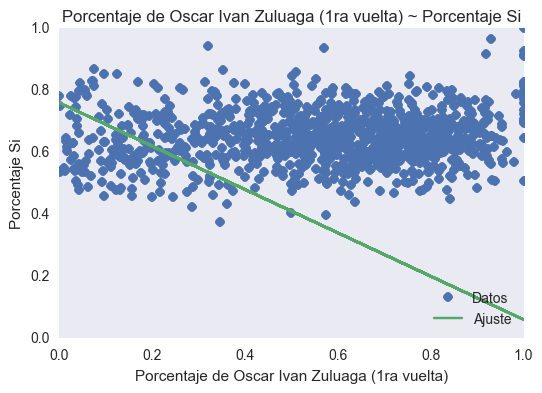

In [226]:
plt.plot(np.array(municipios['Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)'],np.array(municipios['Porcentaje Si'],'o', label='Datos')
plt.plot(x, results['Porcentaje Si']['Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)'][0]*x + results['Porcentaje Si']['Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)'][1], label='Ajuste')
plt.xlabel('Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)')
plt.ylabel('Porcentaje Si')
plt.title('Porcentaje de Oscar Ivan Zuluaga (1ra vuelta) ~ Porcentaje Si')
plt.grid()
plt.legend(loc=4)
plt.show()

### Pearson Coefficient

In [211]:
results['Porcentaje Si']['Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)'][2]

0.0073274766351704105